In [ ]:
import os
import pandas as pd

# Set the directory path
dir_path = "/content/drive/MyDrive/DL/proj/nihar2"

X = []
y = []

# Loop through all files in the directory
for filename in os.listdir(dir_path):
    # Check if the file is a CSV file
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(dir_path, filename)

        # Read the CSV file into a data frame
        df = pd.read_csv(file_path)

        #preprocessing

        df = df.loc[:df[df['click'] == 1].index[-1],:]
        inds = df[df['click'] == 1].index
        for i in range(len(inds)-1):
            dft = df.loc[inds[i]:inds[i+1]]
            dft = dft - dft.iloc[0,:]
            dft.drop(['click','time'], axis=1, inplace=True)
            X.append([dft.loc[ind,['x','y']].tolist() for ind in dft.index])
            y.append(1)


In [ ]:
# Set the directory path
dir_path = "/content/drive/MyDrive/DL/proj/baba"


# Loop through all files in the directory
for filename in os.listdir(dir_path):
    # Check if the file is a CSV file
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(dir_path, filename)

        # Read the CSV file into a data frame
        df = pd.read_csv(file_path)

        #preprocessing

        df = df.loc[:df[df['click'] == 1].index[-1],:]
        inds = df[df['click'] == 1].index
        for i in range(len(inds)-1):
            dft = df.loc[inds[i]:inds[i+1]]
            dft = dft - dft.iloc[0,:]
            dft.drop(['click','time'], axis=1, inplace=True)
            X.append([dft.loc[ind,['x','y']].tolist() for ind in dft.index])
            y.append(0)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming `sequences` is a list of lists, where each inner list is a sequence of [x, y] coordinates
# and `max_sequence_length` is the length you've chosen to pad all sequences to.
max_len = 15
# Pad sequences to the same length
X = pad_sequences(X, maxlen=max_len, padding='post', dtype='float32')

# Now each sequence in padded_sequences has the same length: max_sequence_length


In [ ]:
import numpy as np
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [ ]:
number_of_samples = len(X)
time_steps_per_sample = max_len
number_of_features = 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = X

# Reshape the data for LSTM [samples, time steps, features]
X_scaled = X_scaled.reshape((number_of_samples, time_steps_per_sample, number_of_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Build the LSTM model
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps_per_sample, number_of_features)))
model1.add(LSTM(units=50))
model1.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model1.fit(X_train, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
24/24 [==============================] - 4s 39ms/step - loss: 0.6651 - accuracy: 0.6253 - val_loss: 0.5886 - val_accuracy: 0.8072
Epoch 2/20
24/24 [==============================] - 0s 8ms/step - loss: 0.5634 - accuracy: 0.7237 - val_loss: 0.4474 - val_accuracy: 0.8072
Epoch 3/20
24/24 [==============================] - 0s 8ms/step - loss: 0.4782 - accuracy: 0.7763 - val_loss: 0.3902 - val_accuracy: 0.8434
Epoch 4/20
24/24 [==============================] - 0s 8ms/step - loss: 0.4363 - accuracy: 0.7925 - val_loss: 0.3562 - val_accuracy: 0.8434
Epoch 5/20
24/24 [==============================] - 0s 8ms/step - loss: 0.3957 - accuracy: 0.8100 - val_loss: 0.3474 - val_accuracy: 0.8675
Epoch 6/20
24/24 [==============================] - 0s 8ms/step - loss: 0.3694 - accuracy: 0.8208 - val_loss: 0.3246 - val_accuracy: 0.8434
Epoch 7/20
24/24 [==============================] - 0s 8ms/step - loss: 0.3188 - accuracy: 0.8423 - val_loss: 0.2729 - val_accuracy: 0.8795
Epoch 8/20
24/24 [=

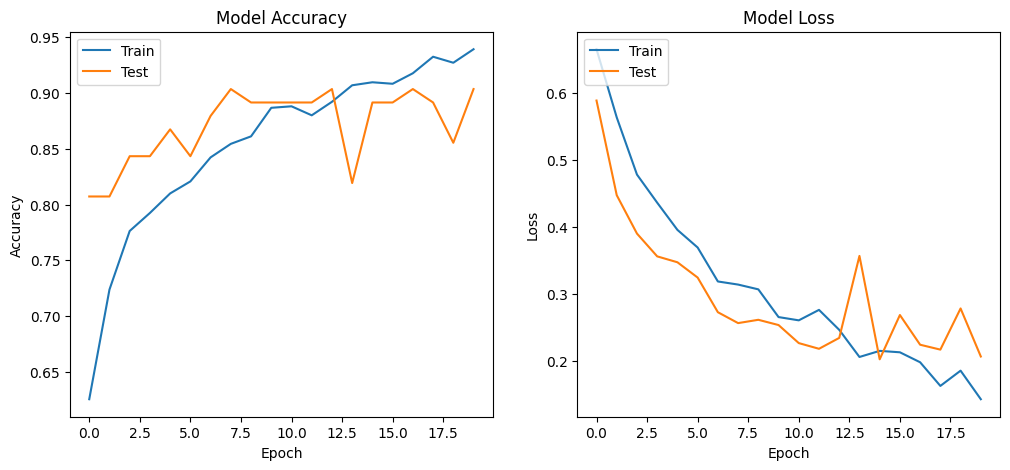

7/7 [==============================] - 0s 4ms/step - loss: 0.5283 - accuracy: 0.8213
Test Loss: 0.5283302068710327
Test Accuracy: 0.8212560415267944
7/7 [==============================] - 1s 4ms/step


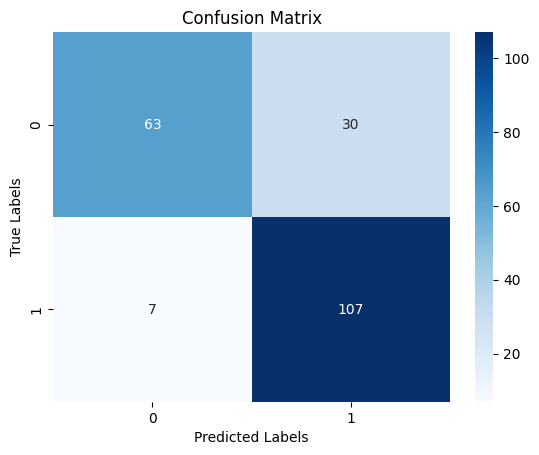

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Evaluate the model
performance = model1.evaluate(X_test, y_test)

print(f"Test Loss: {performance[0]}")
print(f"Test Accuracy: {performance[1]}")

# Predictions for confusion matrix
y_pred = model1.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l1_l2

model2 = Sequential()

# Bidirectional LSTM layer
model2.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(time_steps_per_sample, number_of_features))))
model2.add(Dropout(0.2))

# Additional LSTM layer
model2.add(LSTM(64, return_sequences=True))
model2.add(Dropout(0.2))

# Final LSTM layer does not return sequences
model2.add(LSTM(32))
model2.add(Dropout(0.2))

# Dense layer with L1 and L2 regularization
model2.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model2.add(Dropout(0.2))

# Output layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model2.fit(X_train, y_train, epochs=40, validation_split=0.1, batch_size=64)

Epoch 1/40
12/12 [==============================] - 14s 233ms/step - loss: 2.4743 - accuracy: 0.5606 - val_loss: 2.3633 - val_accuracy: 0.6627
Epoch 2/40
12/12 [==============================] - 0s 18ms/step - loss: 2.2849 - accuracy: 0.7022 - val_loss: 2.1748 - val_accuracy: 0.6988
Epoch 3/40
12/12 [==============================] - 0s 19ms/step - loss: 2.0973 - accuracy: 0.7507 - val_loss: 1.9879 - val_accuracy: 0.7470
Epoch 4/40
12/12 [==============================] - 0s 18ms/step - loss: 1.9051 - accuracy: 0.7965 - val_loss: 1.7918 - val_accuracy: 0.8193
Epoch 5/40
12/12 [==============================] - 0s 17ms/step - loss: 1.7361 - accuracy: 0.8086 - val_loss: 1.6463 - val_accuracy: 0.8313
Epoch 6/40
12/12 [==============================] - 0s 19ms/step - loss: 1.5854 - accuracy: 0.8248 - val_loss: 1.5696 - val_accuracy: 0.7711
Epoch 7/40
12/12 [==============================] - 0s 19ms/step - loss: 1.4565 - accuracy: 0.8369 - val_loss: 1.4265 - val_accuracy: 0.8193
Epoch 8/40


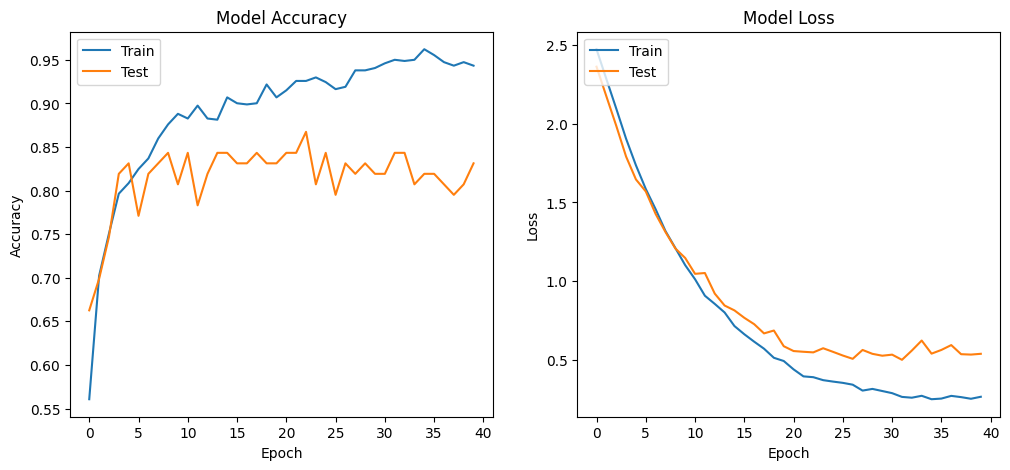

7/7 [==============================] - 0s 5ms/step - loss: 0.3971 - accuracy: 0.8599
Test Loss: 0.39705052971839905
Test Accuracy: 0.8599033951759338
7/7 [==============================] - 1s 4ms/step


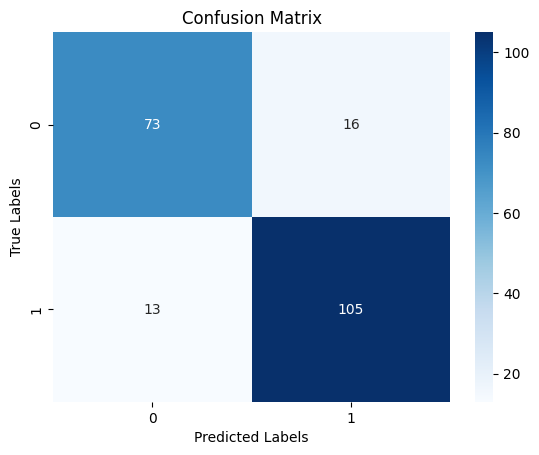

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Evaluate the model
performance = model2.evaluate(X_test, y_test)

print(f"Test Loss: {performance[0]}")
print(f"Test Accuracy: {performance[1]}")

# Predictions for confusion matrix
y_pred = model2.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dense

X_scaled = X_scaled.reshape((number_of_samples, time_steps_per_sample, number_of_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_steps_per_sample, number_of_features)))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = rnn_model.fit(X_train, y_train, epochs=15, validation_split=0.1)



Epoch 1/15
24/24 [==============================] - 6s 37ms/step - loss: 0.7102 - accuracy: 0.5310 - val_loss: 0.6397 - val_accuracy: 0.6627
Epoch 2/15
24/24 [==============================] - 1s 25ms/step - loss: 0.6182 - accuracy: 0.6765 - val_loss: 0.6054 - val_accuracy: 0.6867
Epoch 3/15
24/24 [==============================] - 1s 26ms/step - loss: 0.5743 - accuracy: 0.6833 - val_loss: 0.5879 - val_accuracy: 0.6747
Epoch 4/15
24/24 [==============================] - 1s 25ms/step - loss: 0.5374 - accuracy: 0.7237 - val_loss: 0.5653 - val_accuracy: 0.6867
Epoch 5/15
24/24 [==============================] - 1s 26ms/step - loss: 0.4985 - accuracy: 0.7682 - val_loss: 0.5494 - val_accuracy: 0.7108
Epoch 6/15
24/24 [==============================] - 1s 25ms/step - loss: 0.4675 - accuracy: 0.7978 - val_loss: 0.5294 - val_accuracy: 0.7831
Epoch 7/15
24/24 [==============================] - 1s 25ms/step - loss: 0.4449 - accuracy: 0.8235 - val_loss: 0.5259 - val_accuracy: 0.7590
Epoch 8/15
24

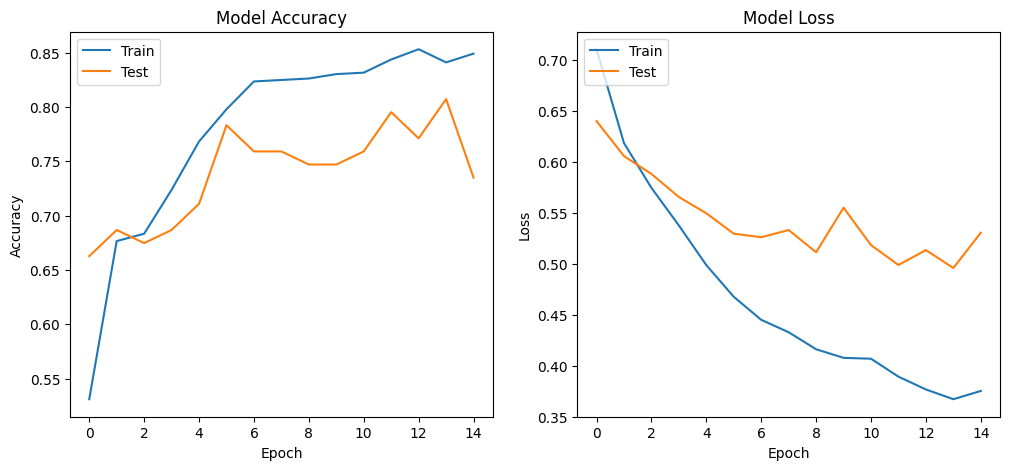

7/7 [==============================] - 0s 8ms/step - loss: 0.5811 - accuracy: 0.7295
Test Loss: 0.5811160206794739
Test Accuracy: 0.729468584060669
7/7 [==============================] - 0s 7ms/step


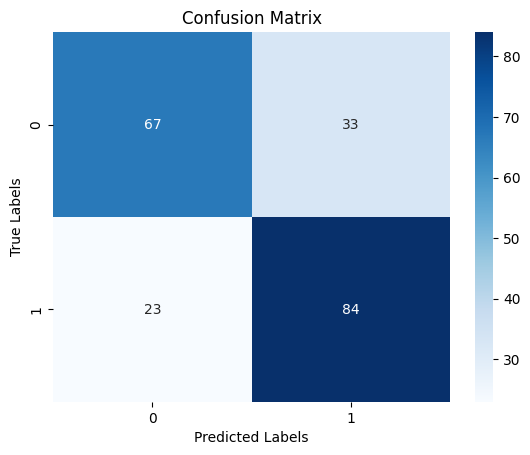

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Evaluate the model
performance = rnn_model.evaluate(X_test, y_test)

print(f"Test Loss: {performance[0]}")
print(f"Test Accuracy: {performance[1]}")

# Predictions for confusion matrix
y_pred = rnn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
## testing

In [ ]:
import os
import pandas as pd

# Set the directory path
dir_path = "/content/drive/MyDrive/DL/proj/ntest"

testx = []

# Loop through all files in the directory
for filename in os.listdir(dir_path):
    # Check if the file is a CSV file
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(dir_path, filename)

        # Read the CSV file into a data frame
        df = pd.read_csv(file_path)

        #preprocessing
        df = df.loc[:df[df['click'] == 1].index[-1],:]
        inds = df[df['click'] == 1].index
        for i in range(len(inds)-1):
            dft = df.loc[inds[i]:inds[i+1]]
            dft = dft - dft.iloc[0,:]
            dft.drop(['click','time'], axis=1, inplace=True)
            testx.append([dft.loc[ind,['x','y']].tolist() for ind in dft.index])
print(len(testx))

101


In [ ]:
testx = pad_sequences(testx, maxlen=max_len, padding='post', dtype='float32')
testx = np.asarray(testx).astype(np.float32)

predictions = model2.predict(testx)

# Apply threshold to get binary class predictions
predicted_classes = (predictions > 0.5).astype(int)

4/4 [==============================] - 0s 5ms/step


In [ ]:
pd.Series(predicted_classes.reshape([len(testx)])).value_counts()

1    87
0    14
Name: count, dtype: int64